We consider a simple neural network that performs regression based on $y = \sin x$.

  0.113937 seconds (430.05 k allocations: 100.189 MiB, 4.51% gc time, 73.68% compilation time: 89% of which was recompilation)


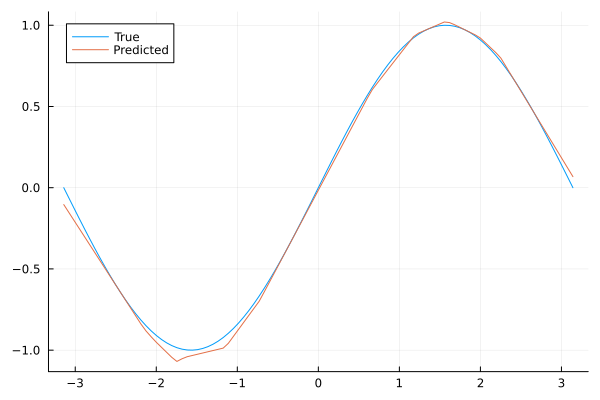

In [5]:
using Lux, Random, Optimization, OptimizationOptimisers, ComponentArrays, Zygote, Plots, LinearAlgebra

# Define data for regression
n = 100
x = range(-π, π; length = n)
y = sin.(x)

# Define a neural network model
model = Chain(Dense(1 => 10, relu), Dense(10 => 10, relu), Dense(10 => 1))

# Define the loss function based on 2-norm
function regression_loss(ps, (model, st, (x, y)))
    ŷ = vec(model(x', ps, st)[1])
    return norm(ŷ - y)
end

# Setup the neural network
rng = MersenneTwister()
ps, st = Lux.setup(rng, model)

# Define the optimization problem
prob = OptimizationProblem(OptimizationFunction(regression_loss, Optimization.AutoZygote()), ComponentArray(ps), (model, st, (x, y)))

# Solve the optimization problem
@time ret = solve(prob, Adam(0.03), maxiters = 250)

# Plot the results
plot(x, y, label="True")
plot!(x, vec(model(x', ret.u, st)[1]), label="Predicted")